# Import Package
```
```



# Install jcompl

In [ ]:
!pip install jcopml

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.7 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.3-py2.py3-none-any.whl size=33140 sha256=fa75e9836c346c30aa98c8114bae4b9574e94d76d46c163d9ad141d35e59a53d
  Stored in directory: /root/.cache/pip/wheels/b8/c7/8d/593a5a8f6957a1d4ba89efb10694e12538e07654616a7ae508
Successfully built jcopml


# PROBLEM STATEMENT

Concern about delays in credit card payments on FinanKu which will harm business. So that people who have the potential to experience late payments can be predicted more quickly to determine appropriate strategies for dealing with future conditions.

# OBJECTIVE

Create a model that can predict at least 60% of customers who will experience late credit card payments [Accuracy & Recall above 60%]

# AVAILABLE VARIABLE

From the dataset there are some of available variable.
---

1. **Customer ID**: Unique ID Customer.
2. **Branch**: Registered customer branch location.
3. **City**: Customer age in year of observation
4. **Age**: Registered customer city location
5. **Avg. Annual Income? Month**: Average annual customer income
6. **Balance (Q1-Q4)**: Average sum of money saving that is stored in FinanKu.
7. **Num of Product (Q1-Q4)**: Total customer product owner of Finanku.
8. **HasCrCard (Q1-Q4)**:The status of credit card ownership (1 = Has, 0 = No).
9. **Unpaid Tagging**: The active status of customer that is observed according to their transaction done.

# EXPERIMENT

Review Period:

1. Customers are reviewed for the past year.
2. Customers are reviewed for the last 6 months.

Variable Adjustment:

1. Balance is seen as an average over a time horizon & changes are seen at the end of the review and the beginning of the review.
2. View the average, maximum, and minimum product count holdings in the review period.
3. Customer activity status is seen in the form of months.

## Import Package

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer,accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from jcopml.feature_importance import mean_score_decrease

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
path_1 = "/content/drive/MyDrive/Business Intelligence & Data Scientiest/Dataset/FinanKu Data All.csv"
path_2 = "/content/drive/MyDrive/Business Intelligence & Data Scientiest/Dataset/FinanKu Data Validasi.csv"
df_all = pd.read_csv(path_1)
df_val = pd.read_csv(path_2)

# Data For Prediction

In [ ]:
path_1 = "https://raw.githubusercontent.com/brainspopper/dataset/main/FinanKu%20Data%20All.csv"
path_2 = "https://raw.githubusercontent.com/brainspopper/dataset/main/FinanKu%20Data%20Validasi.csv"
df_all = pd.read_csv(path_1)
df_val = pd.read_csv(path_2)

Dataset for Experiment 1

In [ ]:
df1 = pd.read_csv(path_1)
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0


Dataset for Experiment 2

In [ ]:
df2 = pd.read_csv(path_1)
df2.head(20)

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.000000e+00,1,1,1,0.000000e+00,1,1,0,0.000000e+00,1,1,0,1.187036e+06,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0
2,15566091,1009,Jakarta,25,12000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,1.351820e+06,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0
4,15566312,1009,Jakarta,43,29000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,6.789057e+05,2,1,1,4.311907e+05,2,1,1,0
5,15566495,1005,Jakarta,27,15000000,5.290661e+07,1,1,1,5.290661e+07,1,1,0,5.317874e+07,1,1,1,5.325285e+07,1,1,1,0
6,15566543,1003,Jakarta,68,26000000,1.104222e+08,1,1,1,1.100293e+08,1,1,1,1.096295e+08,2,1,1,1.096295e+08,2,1,0,0
7,15566594,1008,Jakarta,61,24000000,0.000000e+00,3,1,0,0.000000e+00,3,1,0,0.000000e+00,3,1,0,0.000000e+00,3,1,0,1
8,15566689,1003,Jakarta,43,38000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,2.996062e+05,2,1,1,2.996062e+05,3,1,0,0
9,15566958,1005,Jakarta,70,23000000,7.998257e+07,1,0,0,7.962031e+07,1,0,1,7.940154e+07,1,0,1,7.940154e+07,1,1,0,1


# Data Understanding

Customer distribution according to the location.

- Overall distribution.
- Customers that fail to pay distribution.

In [ ]:
data1 = pd.DataFrame(
                    #Grouping according to location
                    df_all.groupby(by=["City"])["Customer ID"]\
                    #Aggregrated by calculating the total (count)
                    .count()\
                    #Order data in ordeer
                    .sort_values(ascending=False)\
                    #Resetting header name
                    .reset_index(name='Distribution by City')
)
data1

,City,Distribution by City
0,Surabaya,3767
1,Bandung,1898
2,Jakarta,1896


In [ ]:
data2 = pd.DataFrame(\
                     #Grouping according to cities
                     df_all[df_all["Unpaid Tagging"]==1].groupby(by=["City"])["Customer ID"]\
                     # Aggregrated it with calculating the total (count)
                     .count()\
                     # Order data in order
                     .sort_values(ascending=False)\
                     #Resetting header name
                     .reset_index(name='Distribution by City')
                     )
data2

,City,Distribution by City
0,Surabaya,1033
1,Bandung,496
2,Jakarta,490


Customer distribution according to the age

- Overall distribution.
- Customer that fails to repay distribution.

<ipython-input-10-94f722145141>:18: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  data3.plot(x='Age',


<Axes: title={'center': 'Cust. Distribution by Age'}, xlabel='Age', ylabel='# People'>

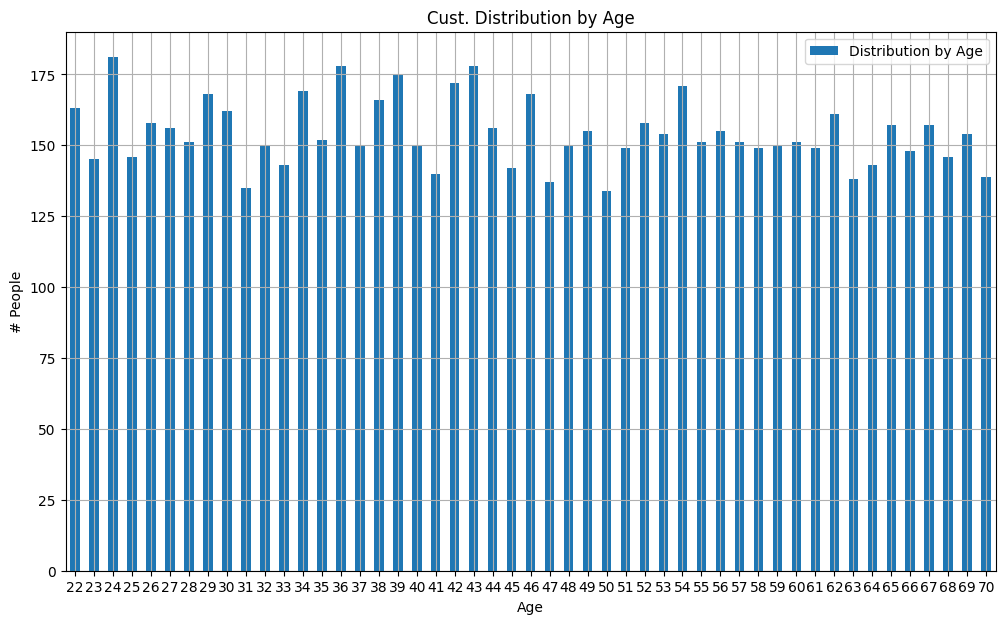

In [ ]:
data3 = pd.DataFrame(\
                     #Grouping according to age
                     df_all.groupby(by=["Age"])["Customer ID"]\
                     #Aggregated it by calculating the total (count)
                     .count()\
                     #Resetting the header
                     .reset_index(name='Distribution by Age')
                    )



data3.sort_values(\
                  by=["Age"], \
                  ascending=True, \
                  inplace=True
                  )

data3.plot(x='Age',
          y=['Distribution by Age'],
          kind='bar',
          grid = True,
          xlabel = 'Age',
          ylabel = '# People',
          figsize=(12,7),
          rot = 0,
          title = 'Cust. Distribution by Age',
          table =  False,
          sort_columns = False,
          secondary_y = False
          )



<ipython-input-11-ae6d0cde57fe>:16: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  data3.plot(x='Age',


<Axes: title={'center': 'Cust. Distribution by Age'}, xlabel='Age', ylabel='# People'>

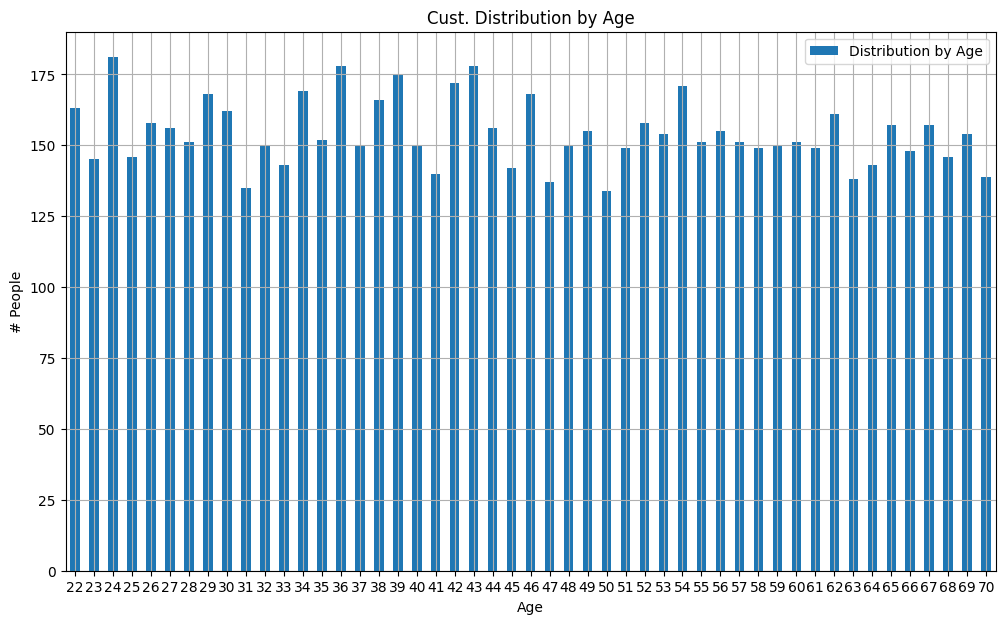

In [ ]:
data3 = pd.DataFrame(\
                     # Grouping according to age
                     df_all.groupby(["Age"])["Customer ID"]\
                     # Aggregated it by calculating the total (count)
                     .count()\
                     # Resetting the header
                     .reset_index(name='Distribution by Age')
                     )

data3.sort_values(\
                  by=["Age"], \
                  ascending=True, \
                  inplace=True
                  )

data3.plot(x='Age',
          y=['Distribution by Age'],
          kind='bar',
          grid=True,
          xlabel='Age',
          ylabel='# People',  # Fixing the typo here (ylabeel -> ylabel)
          figsize=(12,7),
          rot=0,
          title='Cust. Distribution by Age',
          table=False,
          sort_columns=False,
          secondary_y=False
          )


<ipython-input-12-2bfbda88ccd4>:16: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  data4.plot(x='Age',


<Axes: title={'center': 'Unpaid. Distribution by Age'}, xlabel='Age', ylabel='# People'>

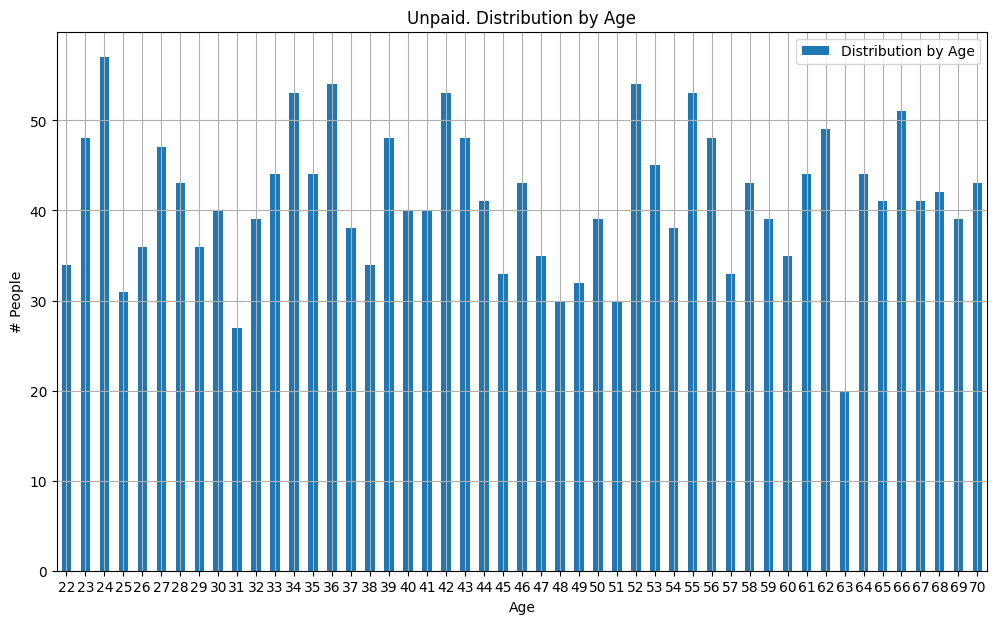

In [ ]:
data4 = pd.DataFrame(\
                     # Grouping according to age
                     df_all[df_all["Unpaid Tagging"]==1].groupby(by=["Age"])["Customer ID"]\
                     # Aggregated it by calculating the total (count)
                     .count()\
                     # Resetting the header
                     .reset_index(name='Distribution by Age')
                     )

data4.sort_values(\
                  by=["Age"], \
                  ascending=True, \
                  inplace=True
                  )

data4.plot(x='Age',
          y=['Distribution by Age'],
          kind='bar',
          grid=True,
          xlabel='Age',
          ylabel='# People',  # Fixing the typo here (ylabeel -> ylabel)
          figsize=(12,7),
          rot=0,
          title='Unpaid. Distribution by Age',
          table=False,
          sort_columns=False,
          secondary_y=False
          )


**Customer Average Balance**

In [ ]:
df_checkbalance = df_all

In [ ]:
df_checkbalance['Total Balance'] = df_checkbalance['Balance Q1'] + df_checkbalance['Balance Q2'] + df_checkbalance['Balance Q3'] + df_checkbalance['Balance Q4']
df_checkbalance['Avg Balance'] = (df_checkbalance['Balance Q1'] + df_checkbalance['Balance Q2'] + df_checkbalance['Balance Q3'] + df_checkbalance['Balance Q4'])/4

df_checkbalance


,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Total Balance,Avg Balance
0,15565701,1001,Jakarta,29,33000000,0.000000e+00,1,1,1,0.000000e+00,1,1,0,0.000000e+00,1,1,0,1.187036e+06,1,1,1,1,1.187036e+06,2.967590e+05
1,15565878,1005,Jakarta,68,17000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0,0.000000e+00,0.000000e+00
2,15566091,1009,Jakarta,25,12000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,1.351820e+06,2,1,1,0,1.351820e+06,3.379551e+05
3,15566292,1008,Jakarta,42,19000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0,0.000000e+00,0.000000e+00
4,15566312,1009,Jakarta,43,29000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,6.789057e+05,2,1,1,4.311907e+05,2,1,1,0,1.110096e+06,2.775241e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15815552,1023,Surabaya,33,16000000,3.038546e+07,1,1,0,2.994553e+07,1,1,1,2.982045e+07,1,1,1,3.020002e+07,1,1,1,1,1.203515e+08,3.008786e+07
7557,15815615,1024,Surabaya,55,18000000,1.685507e+08,1,1,0,1.685507e+08,1,1,0,1.685507e+08,1,1,0,1.685507e+08,1,1,0,0,6.742027e+08,1.685507e+08
7558,15815628,1024,Surabaya,48,18000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0,0.000000e+00,0.000000e+00
7559,15815645,1021,Surabaya,69,20000000,3.795000e+07,1,1,1,3.771258e+07,1,1,1,3.776761e+07,1,1,1,3.793504e+07,1,1,1,0,1.513652e+08,3.784131e+07


In [ ]:
data5 = pd.DataFrame(\
                     # Grouping according to Unpaid Tagging, filter out by total balance
                     df_checkbalance.groupby(by=["Unpaid Tagging"])["Total Balance"]\
                     # Find the average by function .mean()
                     .mean()\
                     # Resetting the header and name it 'Avg Annual Balance'
                     .reset_index(name='Avg Annual Balance')
                     )

data5

,Unpaid Tagging,Avg Annual Balance
0,0,1.985924e+08
1,1,2.527238e+08


In [ ]:
data6 = pd.DataFrame(\
                     # State the dataset then group it according to Unpaid Tagging and Filter it by Avg Balance
                     df_checkbalance.groupby(by=["Unpaid Tagging"])["Avg Balance"]\
                     # Find the average by function .mean()
                     .mean()\
                     # Resetting the header and name it 'Avg Quaterly Balance'
                     .reset_index(name='AVg Quaterly Balance')
                     )

data6

,Unpaid Tagging,AVg Quaterly Balance
0,0,4.964809e+07
1,1,6.318095e+07


**Average Product Ownership**

In [ ]:
df_checkbalance['Avg Product'] = (df_checkbalance['NumOfProducts Q1'] + df_checkbalance['NumOfProducts Q2'] + df_checkbalance['NumOfProducts Q3'] + df_checkbalance['NumOfProducts Q4'])/4
df_checkbalance


,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Total Balance,Avg Balance,Avg Product
0,15565701,1001,Jakarta,29,33000000,0.000000e+00,1,1,1,0.000000e+00,1,1,0,0.000000e+00,1,1,0,1.187036e+06,1,1,1,1,1.187036e+06,2.967590e+05,1.00
1,15565878,1005,Jakarta,68,17000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0,0.000000e+00,0.000000e+00,2.00
2,15566091,1009,Jakarta,25,12000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,1.351820e+06,2,1,1,0,1.351820e+06,3.379551e+05,2.00
3,15566292,1008,Jakarta,42,19000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0,0.000000e+00,0.000000e+00,2.00
4,15566312,1009,Jakarta,43,29000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,6.789057e+05,2,1,1,4.311907e+05,2,1,1,0,1.110096e+06,2.775241e+05,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15815552,1023,Surabaya,33,16000000,3.038546e+07,1,1,0,2.994553e+07,1,1,1,2.982045e+07,1,1,1,3.020002e+07,1,1,1,1,1.203515e+08,3.008786e+07,1.00
7557,15815615,1024,Surabaya,55,18000000,1.685507e+08,1,1,0,1.685507e+08,1,1,0,1.685507e+08,1,1,0,1.685507e+08,1,1,0,0,6.742027e+08,1.685507e+08,1.00
7558,15815628,1024,Surabaya,48,18000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0,0.000000e+00,0.000000e+00,2.00
7559,15815645,1021,Surabaya,69,20000000,3.795000e+07,1,1,1,3.771258e+07,1,1,1,3.776761e+07,1,1,1,3.793504e+07,1,1,1,0,1.513652e+08,3.784131e+07,1.00


In [ ]:
df_checkbalance.columns

Index(['Customer ID', 'Branch Code', 'City', 'Age', 'Avg. Annual Income/Month',
       'Balance Q1', 'NumOfProducts Q1', 'HasCrCard Q1', 'ActiveMember Q1',
       'Balance Q2', 'NumOfProducts Q2', 'HasCrCard Q2', 'ActiveMember Q2',
       'Balance Q3', 'NumOfProducts Q3', 'HasCrCard Q3', 'ActiveMember Q3',
       'Balance Q4', 'NumOfProducts Q4', 'HasCrCard Q4', 'ActiveMember Q4',
       'Unpaid Tagging', 'Total Balance', 'Avg Balance', 'Avg Product'],
      dtype='object')

In [ ]:
data7 = pd.DataFrame(\
                     # State the variable dataset then group it by Unpaid Tagging and Filter it out with Avg Product
                     df_checkbalance.groupby(by=["Unpaid Tagging"])["Avg Product"]\
                     # Since we want to know the average of product owned. We utilize function .mean()
                     .mean()\
                     # Resetting the header and name it as 'Avg Product Owned'
                     .reset_index(name='Avg Product Owned')

                     )

data7

,Unpaid Tagging,Avg Product Owned
0,0,1.667223
1,1,1.609336


In [ ]:
df_all = df_all.drop(columns=['Total Balance', 'Avg Balance','Avg Product'])

In [ ]:
df_all

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.000000e+00,1,1,1,0.000000e+00,1,1,0,0.000000e+00,1,1,0,1.187036e+06,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0
2,15566091,1009,Jakarta,25,12000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,1.351820e+06,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0
4,15566312,1009,Jakarta,43,29000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,6.789057e+05,2,1,1,4.311907e+05,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15815552,1023,Surabaya,33,16000000,3.038546e+07,1,1,0,2.994553e+07,1,1,1,2.982045e+07,1,1,1,3.020002e+07,1,1,1,1
7557,15815615,1024,Surabaya,55,18000000,1.685507e+08,1,1,0,1.685507e+08,1,1,0,1.685507e+08,1,1,0,1.685507e+08,1,1,0,0
7558,15815628,1024,Surabaya,48,18000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0
7559,15815645,1021,Surabaya,69,20000000,3.795000e+07,1,1,1,3.771258e+07,1,1,1,3.776761e+07,1,1,1,3.793504e+07,1,1,1,0


# Data Preparation

## Data Duplicated and *Missing* Data Checking

In [ ]:
df_all.duplicated().sum()

0

In [ ]:
df_all.isnull().sum()

Customer ID                 0
Branch Code                 0
City                        0
Age                         0
Avg. Annual Income/Month    0
Balance Q1                  0
NumOfProducts Q1            0
HasCrCard Q1                0
ActiveMember Q1             0
Balance Q2                  0
NumOfProducts Q2            0
HasCrCard Q2                0
ActiveMember Q2             0
Balance Q3                  0
NumOfProducts Q3            0
HasCrCard Q3                0
ActiveMember Q3             0
Balance Q4                  0
NumOfProducts Q4            0
HasCrCard Q4                0
ActiveMember Q4             0
Unpaid Tagging              0
dtype: int64

## Addition Relevant Variable

**Average Balance & Changes in Balance During Observation Period**

view customer balances within the scope of observation

1. Experiment 1: Average customer balance in the last 1 year & Changes in Balance in Q4 versus Q1.
2. Experiment 2: Average customer balance in the last 6 months & Changes in Balance in Q4 versus Q2.

Experiment 1

In [ ]:
df1['Mean Balance'] = (df1['Balance Q1'] + df1['Balance Q2'] + df1['Balance Q3'] + df1['Balance Q4'])/4
df1['Delta Balance'] = df1['Balance Q4'] - df1['Balance Q1']


In [ ]:
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68


Experiment 2

In [ ]:
df2['Mean Balance'] = (df2['Balance Q3'] + df2['Balance Q4'])/2
df2['Delta Balance'] = df2['Balance Q4'] - df2['Balance Q2']

In [ ]:
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,593518.09,1187036.18
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,675910.12,1351820.24
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,555048.18,431190.68


**Status Active Member**

View how long customers have been active within the scope of observation.

1. Experiment 1 --> Customer activity (in months) in the last 1 year.
2. Experiment 2 --> Customer activity (in months) in the last 6 months.

Experiment 1

In [ ]:
df1['Active Months'] = (df1['ActiveMember Q1'] + df1['ActiveMember Q2'] + df1['ActiveMember Q3'] + df1['ActiveMember Q4'])*3

In [ ]:
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6


Experiment 2

In [ ]:
df2['Active Months'] = (df2['ActiveMember Q3'] + df2['ActiveMember Q4'])*3

In [ ]:
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,593518.09,1187036.18,3
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,675910.12,1351820.24,3
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,555048.18,431190.68,6


**Summation/Subtraction Product Holding**

View fluctuation of customer product ownership on observation period.

Experiment 1

In [ ]:
df1['Diff PH'] = df1['NumOfProducts Q4']-df1['NumOfProducts Q1']

In [ ]:
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6,0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6,0


Experiment 2

In [ ]:
df2['Diff PH'] = df2['NumOfProducts Q4']-df1['NumOfProducts Q2']

In [ ]:
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,593518.09,1187036.18,3,0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,675910.12,1351820.24,3,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,555048.18,431190.68,6,0


**Length of Credit Card Ownership During the Observation Period**

In [ ]:
def assign_cr1(df):
		if df['HasCrCard Q1'] == 1:
				return 12
		elif df['HasCrCard Q2'] == 1:
				return 9
		elif df['HasCrCard Q3'] == 1:
				return 6
		else:
				return 3
		return np.nan

Experiment 1

In [ ]:
df1['Vintage_CR'] = df1.apply(assign_cr1, axis = 1)

In [ ]:
df1.head(11)

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,0.000000e+00,1,1,1,0.000000e+00,1,1,0,0.000000e+00,1,1,0,1.187036e+06,1,1,1,1,2.967590e+05,1187036.18,6,0,12
1,15565878,1005,Jakarta,68,17000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0,0.000000e+00,0.00,3,0,12
2,15566091,1009,Jakarta,25,12000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,1.351820e+06,2,1,1,0,3.379551e+05,1351820.24,3,0,12
3,15566292,1008,Jakarta,42,19000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0,0.000000e+00,0.00,3,0,12
4,15566312,1009,Jakarta,43,29000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,6.789057e+05,2,1,1,4.311907e+05,2,1,1,0,2.775241e+05,431190.68,6,0,12
5,15566495,1005,Jakarta,27,15000000,5.290661e+07,1,1,1,5.290661e+07,1,1,0,5.317874e+07,1,1,1,5.325285e+07,1,1,1,0,5.306120e+07,346243.00,9,0,12
6,15566543,1003,Jakarta,68,26000000,1.104222e+08,1,1,1,1.100293e+08,1,1,1,1.096295e+08,2,1,1,1.096295e+08,2,1,0,0,1.099276e+08,-792643.00,9,1,12
7,15566594,1008,Jakarta,61,24000000,0.000000e+00,3,1,0,0.000000e+00,3,1,0,0.000000e+00,3,1,0,0.000000e+00,3,1,0,1,0.000000e+00,0.00,0,0,12
8,15566689,1003,Jakarta,43,38000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,2.996062e+05,2,1,1,2.996062e+05,3,1,0,0,1.498031e+05,299606.24,6,1,12
9,15566958,1005,Jakarta,70,23000000,7.998257e+07,1,0,0,7.962031e+07,1,0,1,7.940154e+07,1,0,1,7.940154e+07,1,1,0,1,7.960149e+07,-581026.00,6,0,3


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               7561 non-null   int64  
 1   Branch Code               7561 non-null   int64  
 2   City                      7561 non-null   object 
 3   Age                       7561 non-null   int64  
 4   Avg. Annual Income/Month  7561 non-null   int64  
 5   Balance Q1                7561 non-null   float64
 6   NumOfProducts Q1          7561 non-null   int64  
 7   HasCrCard Q1              7561 non-null   int64  
 8   ActiveMember Q1           7561 non-null   int64  
 9   Balance Q2                7561 non-null   float64
 10  NumOfProducts Q2          7561 non-null   int64  
 11  HasCrCard Q2              7561 non-null   int64  
 12  ActiveMember Q2           7561 non-null   int64  
 13  Balance Q3                7561 non-null   float64
 14  NumOfPro

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               7561 non-null   int64  
 1   Branch Code               7561 non-null   int64  
 2   City                      7561 non-null   object 
 3   Age                       7561 non-null   int64  
 4   Avg. Annual Income/Month  7561 non-null   int64  
 5   Balance Q1                7561 non-null   float64
 6   NumOfProducts Q1          7561 non-null   int64  
 7   HasCrCard Q1              7561 non-null   int64  
 8   ActiveMember Q1           7561 non-null   int64  
 9   Balance Q2                7561 non-null   float64
 10  NumOfProducts Q2          7561 non-null   int64  
 11  HasCrCard Q2              7561 non-null   int64  
 12  ActiveMember Q2           7561 non-null   int64  
 13  Balance Q3                7561 non-null   float64
 14  NumOfPro

Experiment 2

In [ ]:
df2['Vintage_CR'] = df2.apply(assign_cr1, axis = 1)

In [ ]:
df2.head(11)

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,0.000000e+00,1,1,1,0.000000e+00,1,1,0,0.000000e+00,1,1,0,1.187036e+06,1,1,1,1,5.935181e+05,1187036.18,3,0,12
1,15565878,1005,Jakarta,68,17000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0,0.000000e+00,0.00,0,0,12
2,15566091,1009,Jakarta,25,12000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,1.351820e+06,2,1,1,0,6.759101e+05,1351820.24,3,0,12
3,15566292,1008,Jakarta,42,19000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0,0.000000e+00,0.00,0,0,12
4,15566312,1009,Jakarta,43,29000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,6.789057e+05,2,1,1,4.311907e+05,2,1,1,0,5.550482e+05,431190.68,6,0,12
5,15566495,1005,Jakarta,27,15000000,5.290661e+07,1,1,1,5.290661e+07,1,1,0,5.317874e+07,1,1,1,5.325285e+07,1,1,1,0,5.321579e+07,346243.00,6,0,12
6,15566543,1003,Jakarta,68,26000000,1.104222e+08,1,1,1,1.100293e+08,1,1,1,1.096295e+08,2,1,1,1.096295e+08,2,1,0,0,1.096295e+08,-399742.00,3,1,12
7,15566594,1008,Jakarta,61,24000000,0.000000e+00,3,1,0,0.000000e+00,3,1,0,0.000000e+00,3,1,0,0.000000e+00,3,1,0,1,0.000000e+00,0.00,0,0,12
8,15566689,1003,Jakarta,43,38000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,2.996062e+05,2,1,1,2.996062e+05,3,1,0,0,2.996062e+05,299606.24,3,1,12
9,15566958,1005,Jakarta,70,23000000,7.998257e+07,1,0,0,7.962031e+07,1,0,1,7.940154e+07,1,0,1,7.940154e+07,1,1,0,1,7.940154e+07,-218765.00,3,0,3


# Variable Removal

Ownership status has been changed with the length of credit card ownership.

In [ ]:
df1 = df1.drop(columns = ['HasCrCard Q1', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4'])
df2 = df2.drop(columns = ['HasCrCard Q1', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4'])

In [ ]:
df1.head(5)

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0.0,1,0,0.00,1,0,1187036.18,1,1,1,296759.045,1187036.18,6,0,12
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0.0,2,0,0.00,2,0,0.00,2,0,0,0.000,0.00,3,0,12
2,15566091,1009,Jakarta,25,12000000,0.0,2,0,0.0,2,0,0.00,2,0,1351820.24,2,1,0,337955.060,1351820.24,3,0,12
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0.0,2,0,0.00,2,0,0.00,2,0,0,0.000,0.00,3,0,12
4,15566312,1009,Jakarta,43,29000000,0.0,2,0,0.0,2,0,678905.68,2,1,431190.68,2,1,0,277524.090,431190.68,6,0,12


Balance Per Quarter that has been changed with the average balance in observation period & difference balance amount in the beginning and end of observation period.

In [ ]:
df1 = df1.drop(columns = ['Balance Q1','Balance Q2','Balance Q3','Balance Q4',])
df2 = df2.drop(columns = ['Balance Q1','Balance Q2','Balance Q3','Balance Q4',])

The total of Product Ownership that has been changed with fluctuation of product ownership on observation period.

In [ ]:
df1 = df1.drop(columns = ['NumOfProducts Q1', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4'])
df2 = df2.drop(columns = ['NumOfProducts Q1', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4'])

Active Member Status that has been changed with fluctuation of product ownership on observation period.

In [ ]:
df1 = df1.drop(columns = ['ActiveMember Q1', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4'])
df2 = df2.drop(columns = ['ActiveMember Q1', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4'])

In [ ]:
df2.head(11)

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,1,5.935181e+05,1187036.18,3,0,12
1,15565878,1005,Jakarta,68,17000000,0,0.000000e+00,0.00,0,0,12
2,15566091,1009,Jakarta,25,12000000,0,6.759101e+05,1351820.24,3,0,12
3,15566292,1008,Jakarta,42,19000000,0,0.000000e+00,0.00,0,0,12
4,15566312,1009,Jakarta,43,29000000,0,5.550482e+05,431190.68,6,0,12
5,15566495,1005,Jakarta,27,15000000,0,5.321579e+07,346243.00,6,0,12
6,15566543,1003,Jakarta,68,26000000,0,1.096295e+08,-399742.00,3,1,12
7,15566594,1008,Jakarta,61,24000000,1,0.000000e+00,0.00,0,0,12
8,15566689,1003,Jakarta,43,38000000,0,2.996062e+05,299606.24,3,1,12
9,15566958,1005,Jakarta,70,23000000,1,7.940154e+07,-218765.00,3,0,3


## Data Transformation

Separation of Predictor Variables

In [ ]:
predictor1 = df1[df1.columns.difference(['Customer ID', 'Unpaid Tagging'])]
predictor2 = df2[df2.columns.difference(['Customer ID', 'Unpaid Tagging'])]

In [ ]:
predictor1.head()

,Active Months,Age,Avg. Annual Income/Month,Branch Code,City,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,6,29,33000000,1001,Jakarta,1187036.18,0,296759.045,12
1,3,68,17000000,1005,Jakarta,0.00,0,0.000,12
2,3,25,12000000,1009,Jakarta,1351820.24,0,337955.060,12
3,3,42,19000000,1008,Jakarta,0.00,0,0.000,12
4,6,43,29000000,1009,Jakarta,431190.68,0,277524.090,12


In [ ]:
predictor2.head()

,Active Months,Age,Avg. Annual Income/Month,Branch Code,City,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,3,29,33000000,1001,Jakarta,1187036.18,0,593518.09,12
1,0,68,17000000,1005,Jakarta,0.00,0,0.00,12
2,3,25,12000000,1009,Jakarta,1351820.24,0,675910.12,12
3,0,42,19000000,1008,Jakarta,0.00,0,0.00,12
4,6,43,29000000,1009,Jakarta,431190.68,0,555048.18,12


**Commit Encoding for Data Category**





Variable Category
1. Branch Code
2. City

For Branch Code we need to convert it into string so it can be assumed as data category

In [ ]:
predictor1['Branch Code'] = predictor1['Branch Code'].astype(str)
predictor2['Branch Code'] = predictor2['Branch Code'].astype(str)


<ipython-input-52-b9748522fe9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor1['Branch Code'] = predictor1['Branch Code'].astype(str)
<ipython-input-52-b9748522fe9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor2['Branch Code'] = predictor2['Branch Code'].astype(str)


In [ ]:
predictor1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Active Months             7561 non-null   int64  
 1   Age                       7561 non-null   int64  
 2   Avg. Annual Income/Month  7561 non-null   int64  
 3   Branch Code               7561 non-null   object 
 4   City                      7561 non-null   object 
 5   Delta Balance             7561 non-null   float64
 6   Diff PH                   7561 non-null   int64  
 7   Mean Balance              7561 non-null   float64
 8   Vintage_CR                7561 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 531.8+ KB


In [ ]:
predictor2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Active Months             7561 non-null   int64  
 1   Age                       7561 non-null   int64  
 2   Avg. Annual Income/Month  7561 non-null   int64  
 3   Branch Code               7561 non-null   object 
 4   City                      7561 non-null   object 
 5   Delta Balance             7561 non-null   float64
 6   Diff PH                   7561 non-null   int64  
 7   Mean Balance              7561 non-null   float64
 8   Vintage_CR                7561 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 531.8+ KB


In [ ]:
predictor1 = pd.get_dummies(predictor1)
predictor2 = pd.get_dummies(predictor2)

In [ ]:
predictor1.head(11)

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,6,29,33000000,1187036.18,0,2.967590e+05,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,68,17000000,0.00,0,0.000000e+00,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,25,12000000,1351820.24,0,3.379551e+05,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,3,42,19000000,0.00,0,0.000000e+00,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6,43,29000000,431190.68,0,2.775241e+05,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5,9,27,15000000,346243.00,0,5.306120e+07,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,9,68,26000000,-792643.00,1,1.099276e+08,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,61,24000000,0.00,0,0.000000e+00,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
8,6,43,38000000,299606.24,1,1.498031e+05,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,6,70,23000000,-581026.00,0,7.960149e+07,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
predictor2.head(11)

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,3,29,33000000,1187036.18,0,5.935181e+05,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,68,17000000,0.00,0,0.000000e+00,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,25,12000000,1351820.24,0,6.759101e+05,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,42,19000000,0.00,0,0.000000e+00,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6,43,29000000,431190.68,0,5.550482e+05,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5,6,27,15000000,346243.00,0,5.321579e+07,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,3,68,26000000,-399742.00,1,1.096295e+08,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,61,24000000,0.00,0,0.000000e+00,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
8,3,43,38000000,299606.24,1,2.996062e+05,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,3,70,23000000,-218765.00,0,7.940154e+07,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
predname = predictor1.columns
predname_num = predictor1.columns[0:7]
predname_cat = predictor1.columns[7:31]

In [ ]:
predname

Index(['Active Months', 'Age', 'Avg. Annual Income/Month', 'Delta Balance',
       'Diff PH', 'Mean Balance', 'Vintage_CR', 'Branch Code_1001',
       'Branch Code_1002', 'Branch Code_1003', 'Branch Code_1004',
       'Branch Code_1005', 'Branch Code_1006', 'Branch Code_1007',
       'Branch Code_1008', 'Branch Code_1009', 'Branch Code_1011',
       'Branch Code_1012', 'Branch Code_1013', 'Branch Code_1014',
       'Branch Code_1015', 'Branch Code_1021', 'Branch Code_1022',
       'Branch Code_1023', 'Branch Code_1024', 'City_Bandung', 'City_Jakarta',
       'City_Surabaya'],
      dtype='object')

In [ ]:
predname_num

Index(['Active Months', 'Age', 'Avg. Annual Income/Month', 'Delta Balance',
       'Diff PH', 'Mean Balance', 'Vintage_CR'],
      dtype='object')

In [ ]:
predname_cat

Index(['Branch Code_1001', 'Branch Code_1002', 'Branch Code_1003',
       'Branch Code_1004', 'Branch Code_1005', 'Branch Code_1006',
       'Branch Code_1007', 'Branch Code_1008', 'Branch Code_1009',
       'Branch Code_1011', 'Branch Code_1012', 'Branch Code_1013',
       'Branch Code_1014', 'Branch Code_1015', 'Branch Code_1021',
       'Branch Code_1022', 'Branch Code_1023', 'Branch Code_1024',
       'City_Bandung', 'City_Jakarta', 'City_Surabaya'],
      dtype='object')

In [ ]:
predictor2.columns

Index(['Active Months', 'Age', 'Avg. Annual Income/Month', 'Delta Balance',
       'Diff PH', 'Mean Balance', 'Vintage_CR', 'Branch Code_1001',
       'Branch Code_1002', 'Branch Code_1003', 'Branch Code_1004',
       'Branch Code_1005', 'Branch Code_1006', 'Branch Code_1007',
       'Branch Code_1008', 'Branch Code_1009', 'Branch Code_1011',
       'Branch Code_1012', 'Branch Code_1013', 'Branch Code_1014',
       'Branch Code_1015', 'Branch Code_1021', 'Branch Code_1022',
       'Branch Code_1023', 'Branch Code_1024', 'City_Bandung', 'City_Jakarta',
       'City_Surabaya'],
      dtype='object')

In [ ]:
X1_num = predictor1[predname_num]
X2_num = predictor2[predname_num]
X1_cat = predictor1[predname_cat]
X2_cat = predictor2[predname_cat]

In [ ]:
predictor1.head(11)

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,6,29,33000000,1187036.18,0,2.967590e+05,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,68,17000000,0.00,0,0.000000e+00,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,25,12000000,1351820.24,0,3.379551e+05,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,3,42,19000000,0.00,0,0.000000e+00,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6,43,29000000,431190.68,0,2.775241e+05,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5,9,27,15000000,346243.00,0,5.306120e+07,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,9,68,26000000,-792643.00,1,1.099276e+08,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,61,24000000,0.00,0,0.000000e+00,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
8,6,43,38000000,299606.24,1,1.498031e+05,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,6,70,23000000,-581026.00,0,7.960149e+07,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
predictor2.head(11)

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,3,29,33000000,1187036.18,0,5.935181e+05,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,68,17000000,0.00,0,0.000000e+00,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,25,12000000,1351820.24,0,6.759101e+05,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,42,19000000,0.00,0,0.000000e+00,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6,43,29000000,431190.68,0,5.550482e+05,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5,6,27,15000000,346243.00,0,5.321579e+07,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,3,68,26000000,-399742.00,1,1.096295e+08,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,61,24000000,0.00,0,0.000000e+00,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
8,3,43,38000000,299606.24,1,2.996062e+05,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,3,70,23000000,-218765.00,0,7.940154e+07,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Numerical Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()
X1_num = pd.DataFrame(pt.fit_transform(X1_num))
X1_num.head()

,0,1,2,3,4,5,6
0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,-1.013239,-1.469071,-1.101011,2.281673,-0.531491,-0.947232,0.296502
3,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,-0.135176,-0.192436,0.327524,0.510182,-0.531491,-0.948314,0.296502


In [ ]:
X1_num.columns = predname_num
X1_num.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,-1.013239,-1.469071,-1.101011,2.281673,-0.531491,-0.947232,0.296502
3,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,-0.135176,-0.192436,0.327524,0.510182,-0.531491,-0.948314,0.296502


In [ ]:
X2_num = pd.DataFrame(pt.fit_transform(X2_num))
X2_num.head()

,0,1,2,3,4,5,6
0,-0.165835,-1.185374,0.663649,2.641819,-0.440014,-0.944440,0.296502
1,-1.471959,1.580668,-0.680854,-0.233476,-0.440014,-0.955071,0.296502
2,-0.165835,-1.469071,-1.101011,3.040967,-0.440014,-0.942964,0.296502
3,-1.471959,-0.263360,-0.512791,-0.233476,-0.440014,-0.955071,0.296502
4,1.140289,-0.192436,0.327524,0.810974,-0.440014,-0.945129,0.296502


In [ ]:
X2_num.columns = predname_num
X2_num.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,-0.165835,-1.185374,0.663649,2.641819,-0.440014,-0.944440,0.296502
1,-1.471959,1.580668,-0.680854,-0.233476,-0.440014,-0.955071,0.296502
2,-0.165835,-1.469071,-1.101011,3.040967,-0.440014,-0.942964,0.296502
3,-1.471959,-0.263360,-0.512791,-0.233476,-0.440014,-0.955071,0.296502
4,1.140289,-0.192436,0.327524,0.810974,-0.440014,-0.945129,0.296502


## Merging Dataset Predictor

In [ ]:
X1 = pd.concat([X1_cat, X1_num], axis = 1)
X2 = pd.concat([X2_cat, X2_num], axis = 1)

In [ ]:
X1.head(11)

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,-1.469071,-1.101011,2.281673,-0.531491,-0.947232,0.296502
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-0.192436,0.327524,0.510182,-0.531491,-0.948314,0.296502
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.742887,-1.327223,-0.848916,0.346724,-0.531491,-0.003589,0.296502
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.742887,1.580668,0.075429,-1.844741,1.520912,1.014209,0.296502
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.891303,1.084199,-0.092634,-0.319523,-0.531491,-0.953281,0.296502
8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-0.192436,1.083807,0.256985,1.520912,-0.950600,0.296502
9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,1.722516,-0.176665,-1.437544,-0.531491,0.471430,-3.372654


In [ ]:
X1_cat

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
7557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
7558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
7559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
X2_cat

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
7557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
7558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
7559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
X1_num

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,-1.013239,-1.469071,-1.101011,2.281673,-0.531491,-0.947232,0.296502
3,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,-0.135176,-0.192436,0.327524,0.510182,-0.531491,-0.948314,0.296502
...,...,...,...,...,...,...,...
7556,0.742887,-0.901678,-0.764885,-0.676360,-0.531491,-0.414767,0.296502
7557,-1.891303,0.658654,-0.596822,-0.319523,-0.531491,2.063446,0.296502
7558,-1.891303,0.162185,-0.596822,-0.319523,-0.531491,-0.953281,0.296502
7559,1.620951,1.651592,-0.428759,-0.348307,-0.531491,-0.275996,0.296502


In [ ]:
X2_num

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,-0.165835,-1.185374,0.663649,2.641819,-0.440014,-0.944440,0.296502
1,-1.471959,1.580668,-0.680854,-0.233476,-0.440014,-0.955071,0.296502
2,-0.165835,-1.469071,-1.101011,3.040967,-0.440014,-0.942964,0.296502
3,-1.471959,-0.263360,-0.512791,-0.233476,-0.440014,-0.955071,0.296502
4,1.140289,-0.192436,0.327524,0.810974,-0.440014,-0.945129,0.296502
...,...,...,...,...,...,...,...
7556,1.140289,-0.901678,-0.764885,0.382957,-0.440014,-0.417489,0.296502
7557,-1.471959,0.658654,-0.596822,-0.233476,-0.440014,2.064226,0.296502
7558,-1.471959,0.162185,-0.596822,-0.233476,-0.440014,-0.955071,0.296502
7559,1.140289,1.651592,-0.428759,0.305372,-0.440014,-0.277030,0.296502


In [ ]:
X2.head(11)

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.165835,-1.185374,0.663649,2.641819,-0.440014,-0.944440,0.296502
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.471959,1.580668,-0.680854,-0.233476,-0.440014,-0.955071,0.296502
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.165835,-1.469071,-1.101011,3.040967,-0.440014,-0.942964,0.296502
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.471959,-0.263360,-0.512791,-0.233476,-0.440014,-0.955071,0.296502
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.140289,-0.192436,0.327524,0.810974,-0.440014,-0.945129,0.296502
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.140289,-1.327223,-0.848916,0.605210,-0.440014,-0.001801,0.296502
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.165835,1.580668,0.075429,-1.201750,2.024390,1.008754,0.296502
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.471959,1.084199,-0.092634,-0.233476,-0.440014,-0.955071,0.296502
8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.165835,-0.192436,1.083807,0.492244,2.024390,-0.949704,0.296502
9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.165835,1.722516,-0.176665,-0.763379,-0.440014,0.467271,-3.372654


In [ ]:
y1 = df1['Unpaid Tagging']
y2 = df2['Unpaid Tagging']

## Preparing Dataset for Validation

### Import Data

In [ ]:
df1_val = pd.read_csv(path_2)
df2_val = pd.read_csv(path_2)

In [ ]:
df1_val.head(10)

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.000000e+00,1,1,0,0.000000e+00,1,1,0,1.187036e+06,1,1,1,1.305740e+06,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,1
2,15566091,1009,Jakarta,25,12000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,1.351820e+06,2,1,1,1.622184e+06,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,4,1,0,1
4,15566312,1009,Jakarta,43,29000000,0.000000e+00,2,1,0,6.789057e+05,2,1,1,4.311907e+05,2,1,1,4.311907e+05,3,1,0,0
5,15566495,1005,Jakarta,27,15000000,5.290661e+07,1,1,0,5.317874e+07,1,1,1,5.325285e+07,1,1,1,6.656606e+07,1,1,1,0
6,15566543,1003,Jakarta,68,26000000,1.100293e+08,1,1,1,1.096295e+08,2,1,1,1.096295e+08,2,1,0,1.644443e+08,3,1,1,0
7,15566594,1008,Jakarta,61,24000000,0.000000e+00,3,1,0,0.000000e+00,3,1,0,0.000000e+00,3,1,0,0.000000e+00,3,1,0,1
8,15566689,1003,Jakarta,43,38000000,0.000000e+00,2,1,0,2.996062e+05,2,1,1,2.996062e+05,3,1,0,2.996062e+05,3,1,0,0
9,15566958,1005,Jakarta,70,23000000,7.962031e+07,1,0,1,7.940154e+07,1,0,1,7.940154e+07,1,1,0,9.131178e+07,1,1,1,0


In [ ]:
df2_val.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0


### Adding Relevant Variable

Average Balance and Changes Balance

In [ ]:
df1_val['Mean Balance'] = (df1_val['Balance Q2']+df1_val['Balance Q3']+df1_val['Balance Q4']+df1_val['Balance Q5'])/4
df2_val['Mean Balance'] = (df2_val['Balance Q4']+df1_val['Balance Q5'])/2

In [ ]:
df1_val['Delta Balance'] = df1_val['Balance Q5']-df1_val['Balance Q2']
df2_val['Delta Balance'] = df2_val['Balance Q5']-df2_val['Balance Q3']

### Active Status

In [ ]:
df1_val['Active Months'] = (df1_val['ActiveMember Q2']+df1_val['ActiveMember Q3']+df1_val['ActiveMember Q4']+df1_val['ActiveMember Q5'])*3
df2_val['Active Months'] = (df2_val['ActiveMember Q4']+df2_val['ActiveMember Q5'])*3

In [ ]:
df2_val

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging,Mean Balance,Delta Balance,Active Months
0,15565701,1001,Jakarta,29,33000000,0.000000e+00,1,1,0,0.000000e+00,1,1,0,1.187036e+06,1,1,1,1.305740e+06,1,1,1,1,1.246388e+06,1305739.798,6
1,15565878,1005,Jakarta,68,17000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,1,0.000000e+00,0.000,0
2,15566091,1009,Jakarta,25,12000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,1.351820e+06,2,1,1,1.622184e+06,2,1,1,0,1.487002e+06,1622184.288,6
3,15566292,1008,Jakarta,42,19000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,4,1,0,1,0.000000e+00,0.000,0
4,15566312,1009,Jakarta,43,29000000,0.000000e+00,2,1,0,6.789057e+05,2,1,1,4.311907e+05,2,1,1,4.311907e+05,3,1,0,0,4.311907e+05,-247715.000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15815552,1023,Surabaya,33,16000000,2.994553e+07,1,1,1,2.982045e+07,1,1,1,3.020002e+07,1,1,1,3.775002e+07,1,1,1,0,3.397502e+07,7929567.750,6
7557,15815615,1024,Surabaya,55,18000000,1.685507e+08,1,1,0,1.685507e+08,1,1,0,1.685507e+08,1,1,0,1.685507e+08,1,1,0,0,1.685507e+08,0.000,0
7558,15815628,1024,Surabaya,48,18000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0,0.000000e+00,0.000,0
7559,15815645,1021,Surabaya,69,20000000,3.771258e+07,1,1,1,3.776761e+07,1,1,1,3.793504e+07,1,1,1,3.793504e+07,1,1,0,0,3.793504e+07,167428.000,3


### Adding/Subtraction Product Holding

In [ ]:
df1_val['Diff PH'] = df1_val['NumOfProducts Q5']-df1_val['NumOfProducts Q2']
df2_val['Diff PH'] = df2_val['NumOfProducts Q5']-df1_val['NumOfProducts Q3']

### Length Credit Card Ownership

In [ ]:
def assign_cr2(df):
    if df['HasCrCard Q2'] == 1:
        return 12
    elif df['HasCrCard Q3'] == 1:
        return 9
    elif df['HasCrCard Q4'] == 1:
        return 6
    else:
        return 3
    return np.nan

In [ ]:
df1_val['Vintage_CR'] = df1_val.apply(assign_cr2, axis = 1)
df2_val['Vintage_CR'] = df2_val.apply(assign_cr2, axis = 1)

### Variable Removal

In [ ]:
df1_val = df1_val.drop(columns = ['HasCrCard Q5', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4','Balance Q5', 'Balance Q2', 'Balance Q3', 'Balance Q4','NumOfProducts Q5', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4','ActiveMember Q5', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4'])
df2_val = df2_val.drop(columns = ['HasCrCard Q5', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4','Balance Q5', 'Balance Q2', 'Balance Q3', 'Balance Q4','NumOfProducts Q5', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4','ActiveMember Q5', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4'])

In [ ]:
df1_val.head(10)

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,1,6.231940e+05,1.305740e+06,6,0,12
1,15565878,1005,Jakarta,68,17000000,1,0.000000e+00,0.000000e+00,0,0,12
2,15566091,1009,Jakarta,25,12000000,0,7.435011e+05,1.622184e+06,6,0,12
3,15566292,1008,Jakarta,42,19000000,1,0.000000e+00,0.000000e+00,0,2,12
4,15566312,1009,Jakarta,43,29000000,0,3.853218e+05,4.311907e+05,6,1,12
5,15566495,1005,Jakarta,27,15000000,0,5.647607e+07,1.365946e+07,9,0,12
6,15566543,1003,Jakarta,68,26000000,0,1.234332e+08,5.441502e+07,9,2,12
7,15566594,1008,Jakarta,61,24000000,1,0.000000e+00,0.000000e+00,0,0,12
8,15566689,1003,Jakarta,43,38000000,0,2.247047e+05,2.996062e+05,3,1,12
9,15566958,1005,Jakarta,70,23000000,0,8.243379e+07,1.169147e+07,9,0,6


In [ ]:
df2_val.head(10)

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,1,1.246388e+06,1.305740e+06,6,0,12
1,15565878,1005,Jakarta,68,17000000,1,0.000000e+00,0.000000e+00,0,0,12
2,15566091,1009,Jakarta,25,12000000,0,1.487002e+06,1.622184e+06,6,0,12
3,15566292,1008,Jakarta,42,19000000,1,0.000000e+00,0.000000e+00,0,2,12
4,15566312,1009,Jakarta,43,29000000,0,4.311907e+05,-2.477150e+05,3,1,12
5,15566495,1005,Jakarta,27,15000000,0,5.990946e+07,1.338732e+07,6,0,12
6,15566543,1003,Jakarta,68,26000000,0,1.370369e+08,5.481477e+07,3,1,12
7,15566594,1008,Jakarta,61,24000000,1,0.000000e+00,0.000000e+00,0,0,12
8,15566689,1003,Jakarta,43,38000000,0,2.996062e+05,0.000000e+00,0,1,12
9,15566958,1005,Jakarta,70,23000000,0,8.535666e+07,1.191023e+07,3,0,6


### Predictor Variable Selection

In [ ]:
predictor1_val = df1_val[df1_val.columns.difference(['Customer ID', 'Unpaid Tagging'])]
predictor2_val = df2_val[df2_val.columns.difference(['Customer ID', 'Unpaid Tagging'])]

In [ ]:
predictor1_val['Branch Code'] = predictor1_val['Branch Code'].astype(str)
predictor2_val['Branch Code'] = predictor2_val['Branch Code'].astype(str)

<ipython-input-92-2d4929c2aa9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor1_val['Branch Code'] = predictor1_val['Branch Code'].astype(str)
<ipython-input-92-2d4929c2aa9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor2_val['Branch Code'] = predictor2_val['Branch Code'].astype(str)


In [ ]:
predictor1_val = pd.get_dummies(predictor1_val)
predictor2_val = pd.get_dummies(predictor2_val)

In [ ]:
predictor1_val.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,6,29,33000000,1305739.798,0,623193.9945,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,68,17000000,0.000,0,0.0000,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,6,25,12000000,1622184.288,0,743501.1320,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,42,19000000,0.000,2,0.0000,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6,43,29000000,431190.680,1,385321.7600,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
X1_num_val = predictor1_val[predname_num]
X2_num_val = predictor2_val[predname_num]
X1_cat_val = predictor1_val[predname_cat]
X2_cat_val = predictor2_val[predname_cat]

In [ ]:
X1_num_val = pd.DataFrame(pt.fit_transform(X1_num_val))
# Transform X1_num_val or validation
X1_num_val.columns = predname_num
# Named column as predname_num

X2_num_val = pd.DataFrame(pt.fit_transform(X2_num_val))
X2_num_val.columns = predname_num

In [ ]:
X1_val = pd.concat([X1_cat, X1_num], axis = 1)
X2_val = pd.concat([X2_cat, X2_num], axis = 1)

In [ ]:
X1_val.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,-1.469071,-1.101011,2.281673,-0.531491,-0.947232,0.296502
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-0.192436,0.327524,0.510182,-0.531491,-0.948314,0.296502


In [ ]:
y1_val = df1_val['Unpaid Tagging']
y2_val = df2_val['Unpaid Tagging']

## Correlation Checking

Variable that correlates more than 0.7 will be dropped

In [ ]:
corrtest1 = X1.corr().abs()
corrtest2 = X2.corr().abs()

In [ ]:
corrtest1

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
Branch Code_1001,1.000000,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,0.028707,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.000365,0.010394,0.003603,0.001462,0.003888,0.009732,0.020774
Branch Code_1002,0.028917,1.000000,0.029128,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.007664,0.006371,0.016078,0.004592,0.003957,0.005634,0.034256
Branch Code_1003,0.028917,0.029128,1.000000,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.018168,0.013724,0.001937,0.008577,0.004227,0.001776,0.021341
Branch Code_1004,0.029673,0.029889,0.029889,1.000000,0.030318,0.028570,0.028941,0.029163,0.029673,0.041555,0.040897,0.040676,0.039442,0.038699,0.066548,0.064658,0.065546,0.067463,0.101388,0.302721,0.174506,0.001120,0.008420,0.002095,0.015427,0.001172,0.013269,0.003376
Branch Code_1005,0.029331,0.029545,0.029545,0.030318,1.000000,0.028241,0.028608,0.028827,0.029331,0.041076,0.040426,0.040208,0.038988,0.038253,0.065782,0.063914,0.064792,0.066686,0.100221,0.299236,0.172498,0.011655,0.001335,0.008829,0.010599,0.001569,0.007520,0.002246
Branch Code_1006,0.027640,0.027842,0.027842,0.028570,0.028241,1.000000,0.026959,0.027165,0.027640,0.038708,0.038095,0.037889,0.036740,0.036048,0.061989,0.060229,0.061056,0.062841,0.094442,0.281983,0.162551,0.006704,0.004534,0.007488,0.000112,0.017499,0.004003,0.008669
Branch Code_1007,0.028000,0.028204,0.028204,0.028941,0.028608,0.026959,1.000000,0.027518,0.028000,0.039212,0.038591,0.038383,0.037219,0.036517,0.062796,0.061013,0.061851,0.063659,0.095672,0.285654,0.164668,0.010148,0.011408,0.024003,0.002511,0.018648,0.006408,0.003749
Branch Code_1008,0.028214,0.028420,0.028420,0.029163,0.028827,0.027165,0.027518,1.000000,0.028214,0.039511,0.038886,0.038676,0.037503,0.036796,0.063276,0.061479,0.062323,0.064146,0.096403,0.287836,0.165926,0.000426,0.005992,0.000678,0.003350,0.006413,0.001808,0.016428
Branch Code_1009,0.028707,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,1.000000,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.002480,0.002933,0.012510,0.001391,0.012129,0.005874,0.014582
Branch Code_1011,0.040203,0.040496,0.040496,0.041555,0.041076,0.038708,0.039212,0.039511,0.040203,1.000000,0.055410,0.055110,0.053439,0.052431,0.090163,0.087603,0.088806,0.091403,0.409857,0.137270,0.236432,0.001055,0.011252,0.016018,0.025531,0.004062,0.005530,0.020666


In [ ]:
corrtest2

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
Branch Code_1001,1.000000,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,0.028707,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.007562,0.010394,0.003603,0.010657,0.002625,0.009749,0.020774
Branch Code_1002,0.028917,1.000000,0.029128,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.011636,0.006371,0.016078,0.001174,0.000411,0.005640,0.034256
Branch Code_1003,0.028917,0.029128,1.000000,0.029889,0.029545,0.027842,0.028204,0.028420,0.028917,0.040496,0.039855,0.039639,0.038437,0.037713,0.064852,0.063011,0.063876,0.065744,0.098804,0.295007,0.170060,0.011636,0.013724,0.001937,0.016142,0.007450,0.001736,0.021341
Branch Code_1004,0.029673,0.029889,0.029889,1.000000,0.030318,0.028570,0.028941,0.029163,0.029673,0.041555,0.040897,0.040676,0.039442,0.038699,0.066548,0.064658,0.065546,0.067463,0.101388,0.302721,0.174506,0.007556,0.008420,0.002095,0.023383,0.007340,0.013205,0.003376
Branch Code_1005,0.029331,0.029545,0.029545,0.030318,1.000000,0.028241,0.028608,0.028827,0.029331,0.041076,0.040426,0.040208,0.038988,0.038253,0.065782,0.063914,0.064792,0.066686,0.100221,0.299236,0.172498,0.009181,0.001335,0.008829,0.010614,0.003334,0.007493,0.002246
Branch Code_1006,0.027640,0.027842,0.027842,0.028570,0.028241,1.000000,0.026959,0.027165,0.027640,0.038708,0.038095,0.037889,0.036740,0.036048,0.061989,0.060229,0.061056,0.062841,0.094442,0.281983,0.162551,0.002050,0.004534,0.007488,0.007557,0.002061,0.004017,0.008669
Branch Code_1007,0.028000,0.028204,0.028204,0.028941,0.028608,0.026959,1.000000,0.027518,0.028000,0.039212,0.038591,0.038383,0.037219,0.036517,0.062796,0.061013,0.061851,0.063659,0.095672,0.285654,0.164668,0.013401,0.011408,0.024003,0.002299,0.018009,0.006425,0.003749
Branch Code_1008,0.028214,0.028420,0.028420,0.029163,0.028827,0.027165,0.027518,1.000000,0.028214,0.039511,0.038886,0.038676,0.037503,0.036796,0.063276,0.061479,0.062323,0.064146,0.096403,0.287836,0.165926,0.005226,0.005992,0.000678,0.009595,0.012922,0.001792,0.016428
Branch Code_1009,0.028707,0.028917,0.028917,0.029673,0.029331,0.027640,0.028000,0.028214,1.000000,0.040203,0.039566,0.039353,0.038159,0.037440,0.064383,0.062555,0.063414,0.065268,0.098089,0.292872,0.168829,0.002926,0.002933,0.012510,0.002003,0.022414,0.005889,0.014582
Branch Code_1011,0.040203,0.040496,0.040496,0.041555,0.041076,0.038708,0.039212,0.039511,0.040203,1.000000,0.055410,0.055110,0.053439,0.052431,0.090163,0.087603,0.088806,0.091403,0.409857,0.137270,0.236432,0.002436,0.011252,0.016018,0.021118,0.012993,0.005449,0.020666


In [ ]:
# To throw away Redundant Value in Matrix
upper = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(np.bool))

# Search for Value that is correlated above 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# To remove column that is correlated above 0.7
X1 = X1.drop(to_drop, axis=1)
X1_val = X1_val.drop(to_drop, axis=1)

<ipython-input-103-cc4cb55e0202>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(np.bool))


In [ ]:
X1.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,-1.469071,-1.101011,2.281673,-0.531491,-0.947232,0.296502
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-0.192436,0.327524,0.510182,-0.531491,-0.948314,0.296502


In [ ]:
# Removing Redundant Value in Matrix
upper2 = corrtest2.where(np.triu(np.ones(corrtest2.shape), k=1).astype(np.bool))

# Searching Value that correlates aboves 0.7
to_drop2 = [column for column in upper2.columns if any(upper2[column] > 0.7)]

# Removing column that correlates above 0.7
X2 = X2.drop(to_drop2, axis=1)
X2_val = X2_val.drop(to_drop2, axis=1)

<ipython-input-105-1804c212d768>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper2 = corrtest2.where(np.triu(np.ones(corrtest2.shape), k=1).astype(np.bool))


In [ ]:
X2.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.165835,-1.185374,0.663649,2.641819,-0.440014,-0.944440,0.296502
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.471959,1.580668,-0.680854,-0.233476,-0.440014,-0.955071,0.296502
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.165835,-1.469071,-1.101011,3.040967,-0.440014,-0.942964,0.296502
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.471959,-0.263360,-0.512791,-0.233476,-0.440014,-0.955071,0.296502
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.140289,-0.192436,0.327524,0.810974,-0.440014,-0.945129,0.296502


## Splitting Train-Test Data

In [ ]:
y1.value_counts()

0    5542
1    2019
Name: Unpaid Tagging, dtype: int64

In [ ]:
y2.value_counts()

0    5542
1    2019
Name: Unpaid Tagging, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, stratify=y1, random_state=30)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, stratify=y2, random_state=30)

# Modeling

Model building will use 3 algorithms:

1. Logistic Regression
2. Gradient Boosting
3. Random Forest

## Logistic Regression

Perform Hyperparameter Definition

In [ ]:
penalty = ['l2']
tol = [0.001, 0.0001, 0.00001]
C = [100.0, 10.0, 1.00, 0.1, 0.01, 0.001]
fit_intercept = [True, False]
intercept_scaling = [1.0, 0.75, 0.5, 0.25]
class_weight = ['balanced', None]
solver = ['newton-cg', 'sag', 'lbfgs', 'saga']
max_iter=[14000]
param_distributions = dict(penalty=penalty, tol=tol, C=C, fit_intercept=fit_intercept, intercept_scaling=intercept_scaling,
                  class_weight=class_weight, solver=solver, max_iter=max_iter)

Perform The Best Hyperparameter Search

In [ ]:
from sklearn.model_selection import GridSearchCV

### Experiment 1

In [ ]:
import time

#cv = cross validation
logreg = LogisticRegression()
grid = GridSearchCV(estimator=logreg, param_grid = param_distributions , scoring = 'recall', cv = 5, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X1_train, y1_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

Best: 0.417563 using {'C': 100.0, 'class_weight': 'balanced', 'fit_intercept': True, 'intercept_scaling': 1.0, 'max_iter': 14000, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.001}
Execution time: 876.4441277980804 s


### Experiment 2

In [ ]:
grid2 = GridSearchCV(estimator=logreg, param_grid = param_distributions , scoring = 'recall', cv = 5, n_jobs=-1)
start_time = time.time()
grid_result2 = grid2.fit(X2_train, y2_train)
# Summarize results
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

Best: 0.394206 using {'C': 1.0, 'class_weight': 'balanced', 'fit_intercept': False, 'intercept_scaling': 0.75, 'max_iter': 14000, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.001}
Execution time: 808.0350823402405 s


## Gradient Boosting

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
gbparameter = {'max_depth':[5,10,15],'gamma':[0.0,0.1,0.2,0.3], 'n_estimators':[25,50,75,100],'learning_rate':[0.05,0.1,0.2,0.3], 'scale_pos_weight':[1,3]}
score = {'accuracy':make_scorer(accuracy_score), 'precision':make_scorer(precision_score),'recall':make_scorer(recall_score), 'f1':make_scorer(f1_score)}

Gamma: minimum value of loss reduction required when splitting a branch. The larger the gamma value set, the more conservative the model built will be and the possibility of underfitting to occur.

Learning_rate: feature weight adjustment rate. In building the model, each iteration produces weights for the features it has. Learning_rate is useful to help reduce the weight value so that the model being built does not experience overfitting.

Scale_pos_weight: setting the weight between the positive (churn) class and the negative (not churn) class. This hyperparameter is very useful when the dataset used is an imbalance dataset. The value usually used is the number of majority classes divided by the number of minority classes.

### Experiment 1

In [ ]:
GB_Grid = GridSearchCV(XGBClassifier(), gbparameter, cv=5,refit='recall', verbose=0, n_jobs=-1, scoring=score)

In [ ]:
start_time = time.time()
GB_result = GB_Grid.fit(X1_train, y1_train)
# Summarize results
print("Best: %f using %s" % (GB_result.best_score_, GB_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

Best: 0.573270 using {'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 25, 'scale_pos_weight': 3}
Execution time: 339.40326619148254 s


### Experiment 2

In [ ]:
GB_Grid2 = GridSearchCV(XGBClassifier(), gbparameter, cv=5,refit='recall', verbose=0, n_jobs=-1, scoring=score)

In [ ]:
start_time = time.time()
GB2_result = GB_Grid2.fit(X2_train, y2_train)
# Summarize results
print("Best: %f using %s" % (GB2_result.best_score_, GB2_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

Best: 0.479177 using {'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 25, 'scale_pos_weight': 3}
Execution time: 312.43092823028564 s


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
parameter = {'max_depth':[5,10,15,20],'max_features':['auto','sqrt','log2'], 'n_estimators':[25,50,75,100,125],'min_samples_split':[2,3,5,7]}
score = {'accuracy':make_scorer(accuracy_score), 'precision':make_scorer(precision_score),'recall':make_scorer(recall_score), 'f1':make_scorer(f1_score)}

Max_depth: maximum number of split branches or levels in one tree. The greater the max_depth value set, the more precise the model will be in classifying data into a class. However, the larger the max_depth value will also make the model overfitting.

Max_features: maximum number of features to consider when splitting nodes. Likewise with max_depth¸ the greater the number of features considered in branch splitting, the more detailed the results will be but it will also make the model overfitting to the training data.

N_estimator: number of trees to build. The more trees, the better the level of accuracy obtained considering that Random Forest uses the majority vote concept in carrying out classification. However, the more trees that are built, the higher the computing time required.

Min_sample_split: minimum number of data samples on an internal node. A large value can make the model built more conservative. However, if it is too large it can cause the model being built to be underfitting.

Experiment 1

In [ ]:
RF_Grid = GridSearchCV(RandomForestClassifier(), parameter, cv=5,refit='recall', verbose=0, n_jobs=-1, scoring=score)

In [ ]:
start_time = time.time()
RF_result = RF_Grid.fit(X1_train, y1_train)
# Summarize results
print("Best: %f using %s" % (RF_result.best_score_, RF_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

Best: 0.322028 using {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 25}
Execution time: 434.6650424003601 s


Experiment 2

In [ ]:
RF_Grid2 = GridSearchCV(RandomForestClassifier(), parameter, cv=5,refit='recall', verbose=0, n_jobs=-1, scoring=score)

In [ ]:
start_time = time.time()
RF_result2 = RF_Grid2.fit(X2_train, y2_train)
# Summarize results
print("Best: %f using %s" % (RF_result2.best_score_, RF_result2.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

Best: 0.318480 using {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 25}
Execution time: 431.17125940322876 s


# Evaluation

## Logistic Regression

### Experiment 1

In [ ]:
y1_pred =grid.predict(X1_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))
print("Recall:",metrics.recall_score(y1_test, y1_pred))
metrics.completeness_score

Accuracy: 0.7765535478184222
Recall: 0.43564356435643564


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [ ]:
y12_pred_val =RF_Grid.predict(X1_val)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_val, y12_pred_val))
print("Recall:",metrics.recall_score(y1_val, y12_pred_val))
metrics.completeness_score

Accuracy: 0.704404179341357
Recall: 0.35400516795865633


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

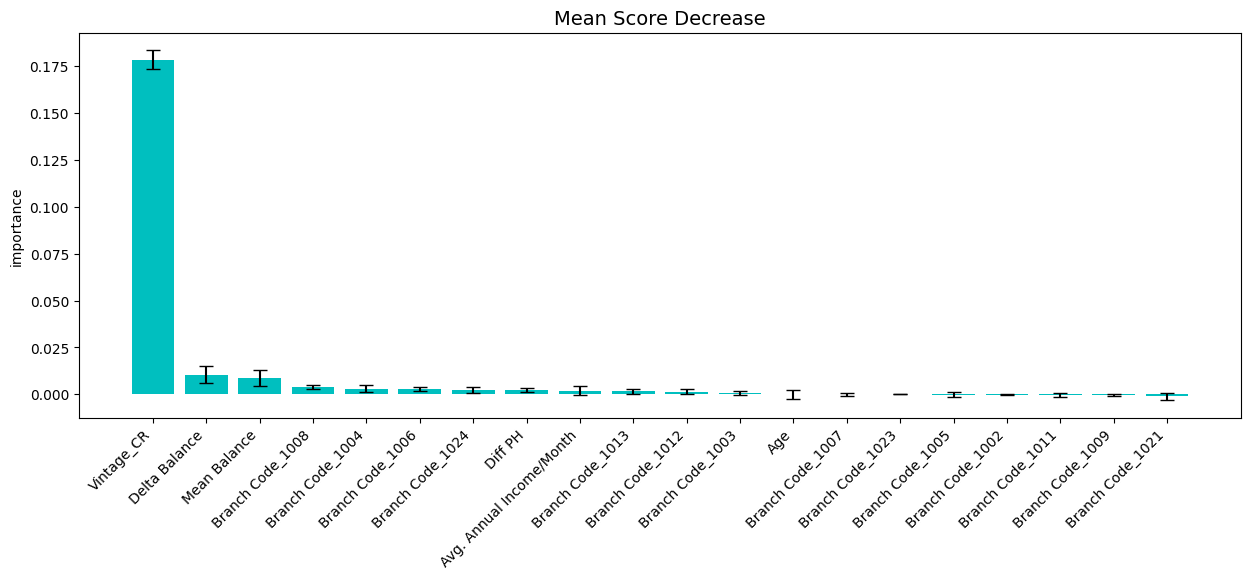

In [ ]:
from jcopml.feature_importance import mean_score_decrease
df_imp1 = mean_score_decrease(X1_train, y1_train, grid, plot= True, topk=20)

Experiment 2

In [ ]:
y2_pred =grid2.predict(X2_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))
print("Recall:",metrics.recall_score(y2_test, y2_pred))
metrics.completeness_score

Accuracy: 0.7593653591890701
Recall: 0.41089108910891087


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [ ]:
y2_pred_val =grid2.predict(X2_val)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_val, y2_pred_val))
print("Recall:",metrics.recall_score(y2_val, y2_pred_val))
metrics.completeness_score

Accuracy: 0.6361592381960058
Recall: 0.2454780361757106


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

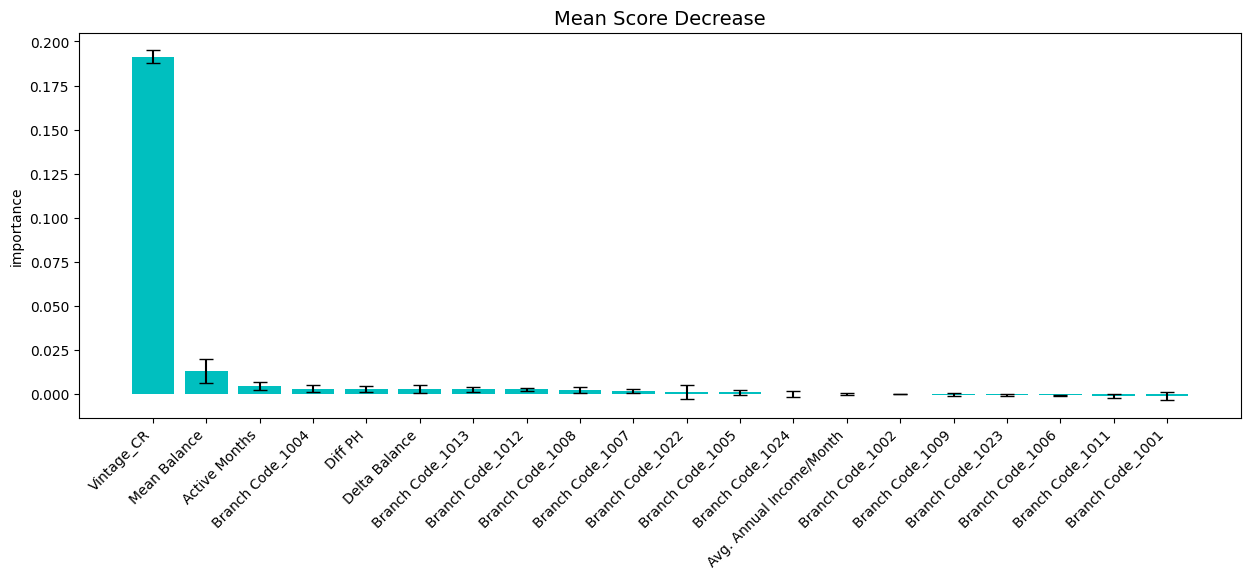

In [ ]:
df_imp2 = mean_score_decrease(X2_train, y2_train, grid2, plot= True, topk=20)

## Gradient Boosting

### Experiment 1

In [ ]:
y11_pred =GB_Grid.predict(X1_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y11_pred))
print("Recall:",metrics.recall_score(y1_test, y11_pred))
metrics.completeness_score

Accuracy: 0.6862053768179814
Recall: 0.6056105610561056


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [ ]:
y11_pred_val =GB_Grid.predict(X1_val)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_val, y11_pred_val))
print("Recall:",metrics.recall_score(y1_val, y11_pred_val))
metrics.completeness_score

Accuracy: 0.5933077635233435
Recall: 0.4485049833887043


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

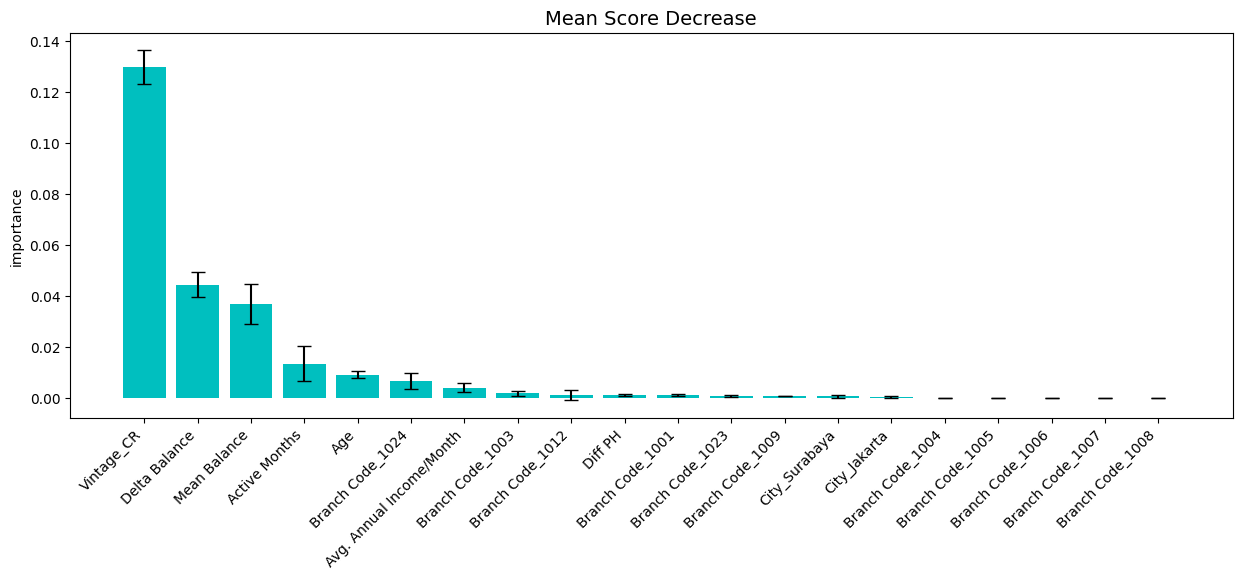

In [ ]:
df_imp3 = mean_score_decrease(X1_train, y1_train, GB_Grid, plot= True, topk=20)

### Experiment 2

In [ ]:
y22_pred =GB_Grid2.predict(X2_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_test, y22_pred))
print("Recall:",metrics.recall_score(y2_test, y22_pred))
metrics.completeness_score

Accuracy: 0.7192595857205818
Recall: 0.5066006600660066


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [ ]:
y22_pred_val =GB_Grid2.predict(X2_val)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_val, y22_pred_val))
print("Recall:",metrics.recall_score(y2_val, y22_pred_val))
metrics.completeness_score

Accuracy: 0.6306044174051052
Recall: 0.38870431893687707


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

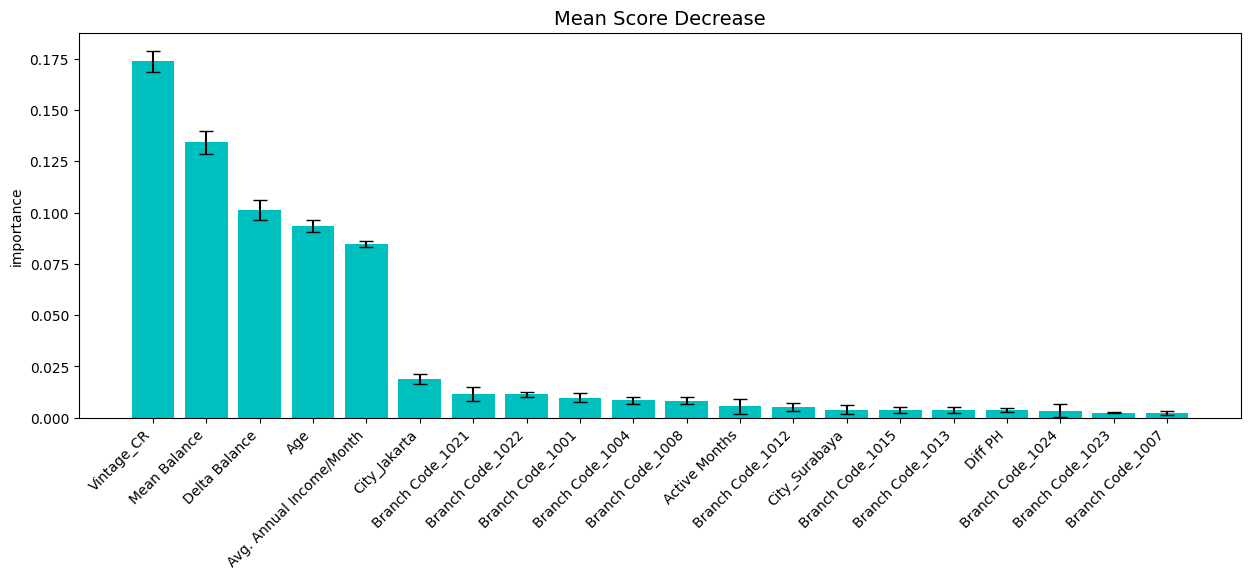

In [ ]:
df_imp4 = mean_score_decrease(X2_train, y2_train, GB_Grid2, plot= True, topk=20)

## Random Forest

Experiment 1

In [ ]:
y12_pred =RF_Grid.predict(X1_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y12_pred))
print("Recall:",metrics.recall_score(y1_test, y12_pred))
metrics.completeness_score

Accuracy: 0.8087263111502865
Recall: 0.3333333333333333


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [ ]:
y12_pred_val =RF_Grid.predict(X1_val)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_val, y12_pred_val))
print("Recall:",metrics.recall_score(y1_val, y12_pred_val))
metrics.completeness_score

Accuracy: 0.704404179341357
Recall: 0.35400516795865633


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

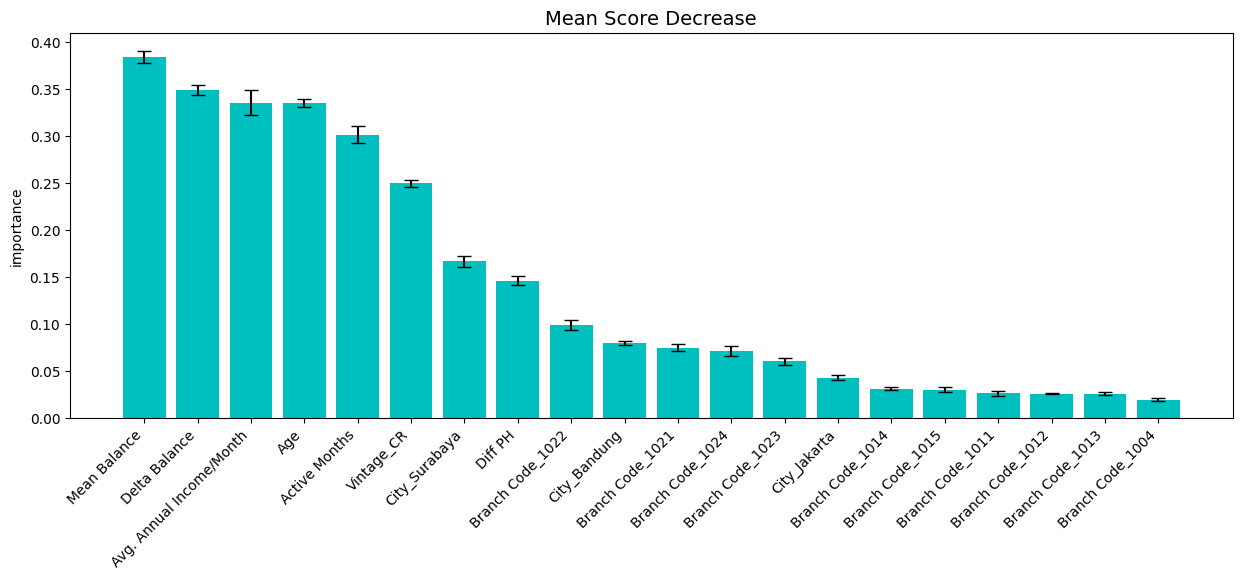

In [ ]:
df_imp5 = mean_score_decrease(X1_train, y1_train, RF_Grid, plot= True, topk=20)

### Experiment 2

In [ ]:
y21_pred =RF_Grid2.predict(X2_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_test, y21_pred))
print("Recall:",metrics.recall_score(y2_test, y21_pred))
metrics.completeness_score

Accuracy: 0.8082855883649185
Recall: 0.334983498349835


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [ ]:
y21_pred_val =RF_Grid2.predict(X2_val)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y2_val, y21_pred_val))
print("Recall:",metrics.recall_score(y2_val, y21_pred_val))
metrics.completeness_score

Accuracy: 0.6995106467398492
Recall: 0.3281653746770026


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

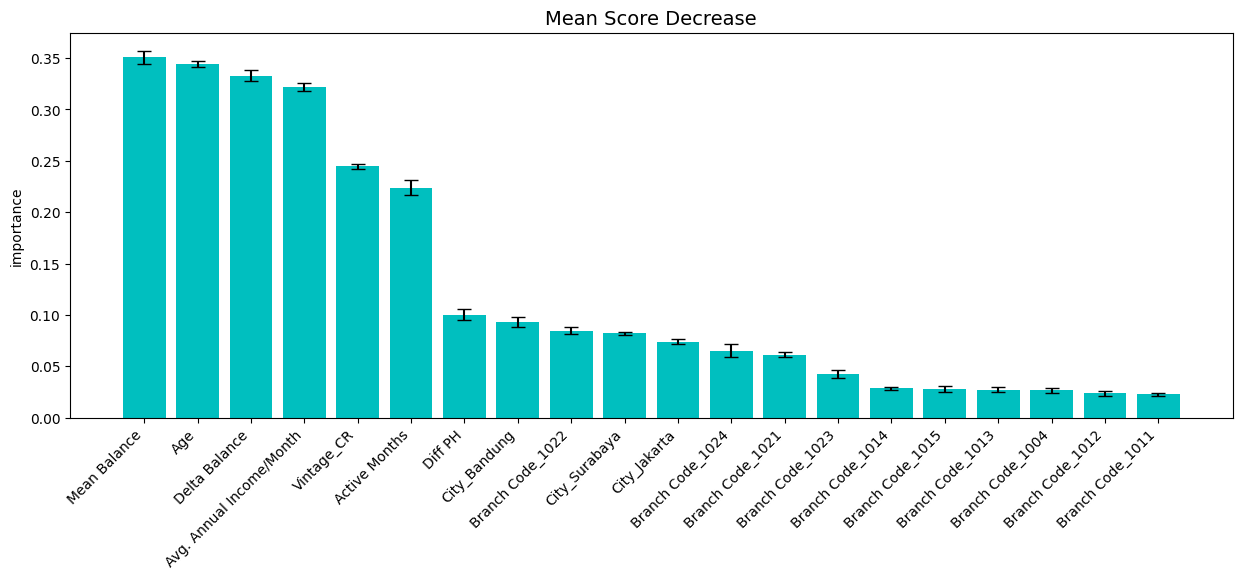

In [ ]:
df_imp6 = mean_score_decrease(X2_train, y2_train, RF_Grid2, plot= True, topk=20)

# Conclusion

Of all the models, the average accuracy is above 60% but the recall is below 40%. This means that there are still many customers who actually have the potential to default but are predicted not to default. So it can be said that in this iteration of model development, the desired objectives have not yet been achieved.

Future development solutions that can be implemented include:

Increasing the sample (the number of customers assuming the currently available dataset is not the total customer population)
Oversampling the minority class (defaulters) so that model building is not biased
Expanding time horizons
Try variations of other variables (adding new variables, or removing variables that have a low importance value in the last result)
Trying to expand hyperparameter combinations in model building
Try other supervised machine learning algorithms